### Import libraries 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Read csv file

In [6]:
def read_file(path):
    df = None
    if path.split('.')[-1] == 'csv':
        df = pd.read_csv(path)
        return df
        
file_path = 'titanic_dataset.csv'
titanic_data = read_file(file_path)### Import libraries 

### Data Visualization

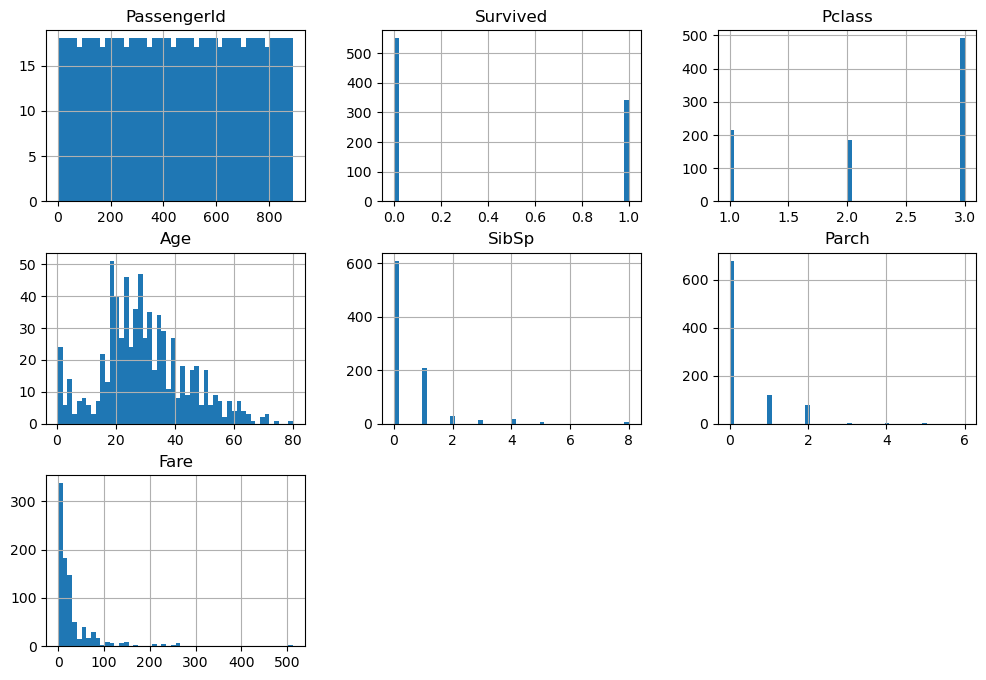

In [7]:
def plot_hist(df):
    df.hist(bins=50, figsize=(12,8))
    plt.show()

plot_hist(titanic_data)

### Data pre-processing and feature extraction

In [8]:
def extract_features(dataset, X_features, y_features):
    X_dataset = dataset[X_features]
    y_dataset = dataset[y_features]

    return X_dataset, y_dataset

def one_hot_encoding(dataset, flag):
    encoding_dataset = pd.get_dummies(dataset)
    
    if flag:
        print('Before one hot encoding:\n{0}\n'.format(dataset.head()))
        print('After one hot encoding:\n{0}\n'.format(encoding_dataset.head()))
        
    return encoding_dataset
    

y_features = ['Survived']
X_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X_dataset, y_dataset = extract_features(titanic_data, X_features, y_features)

X_dataset = one_hot_encoding(X_dataset, flag = True)

y_dataset = one_hot_encoding(y_dataset, flag = True)

Before one hot encoding:
   Pclass     Sex  SibSp  Parch
0       3    male      1      0
1       1  female      1      0
2       3  female      0      0
3       1  female      1      0
4       3    male      0      0

After one hot encoding:
   Pclass  SibSp  Parch  Sex_female  Sex_male
0       3      1      0           0         1
1       1      1      0           1         0
2       3      0      0           1         0
3       1      1      0           1         0
4       3      0      0           0         1

Before one hot encoding:
   Survived
0         0
1         1
2         1
3         1
4         0

After one hot encoding:
   Survived
0         0
1         1
2         1
3         1
4         0



### Shuffle and split the dataset into test and train data

In [9]:
def shuffle_and_split_data(X_dataset, y_dataset, test_ratio, flag):
    shuffle_indices = np.random.permutation(len(X_dataset))
    
    test_set_size = int(len(X_dataset) * test_ratio)
    
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    
    X_train_data = X_dataset.iloc[train_indices]
    X_test_data = X_dataset.iloc[test_indices]
    y_train_data = y_dataset.iloc[train_indices]
    y_test_data = y_dataset.iloc[test_indices]
    
    if flag:    
        print('Train data size: {0}'.format(len(X_train_data)))
        print('Test data size: {0}'.format(len(X_test_data)))
        
    return X_train_data, X_test_data, y_train_data, y_test_data

X_train, X_test, y_train, y_test = shuffle_and_split_data(X_dataset, y_dataset, 0.2, flag = True)

Train data size: 713
Test data size: 178


### Create Model 

In [10]:
def random_forest_model(X_train, y_train, n_estimators, max_depth):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=1)
    model.fit(X_train, y_train)
    return model

model = random_forest_model(X_train, y_train, n_estimators=10, max_depth=7)

C:\Users\X-WAY\AppData\Local\Temp\ipykernel_3536\369502643.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


### Predict and accuracy checking

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy {0}'.format(accuracy))

Accuracy 0.7752808988764045
